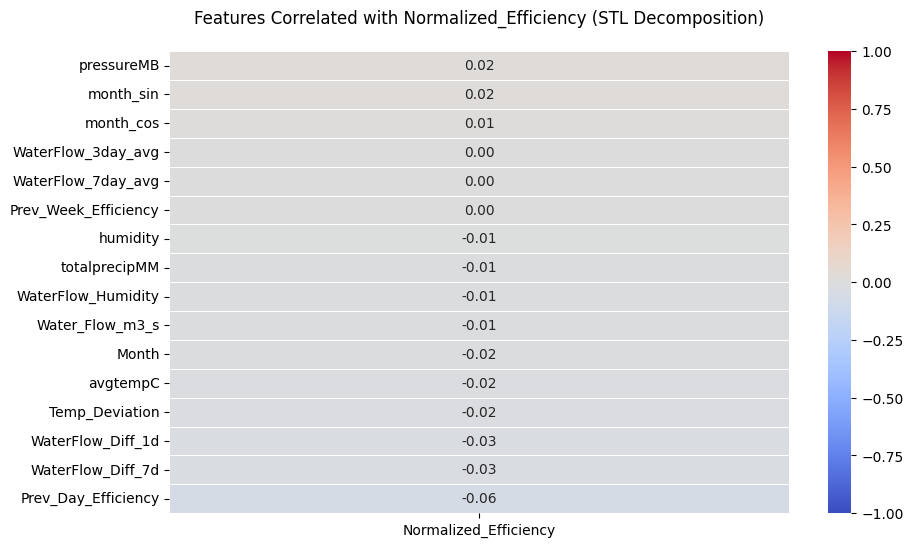

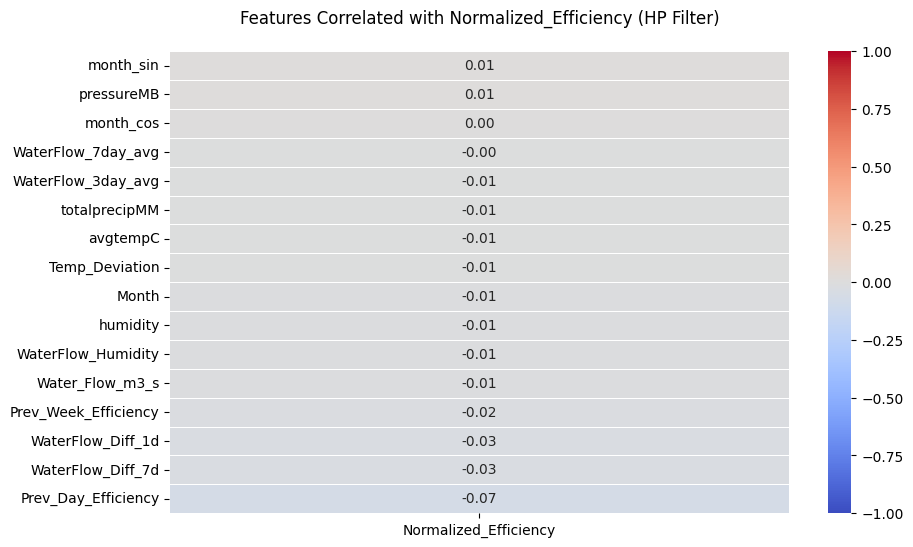

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
stl_path = "../processed_data/STL/stl_energy_production_with_engineered_features.csv"
hp_path = "../processed_data/HP/hp_energy_production_with_engineered_features.csv"

stl_df = pd.read_csv(stl_path)
hp_df = pd.read_csv(hp_path)

def plot_correlation_heatmap(df, title):
    # Keep only numeric columns
    numeric_df = df.select_dtypes(include=['float64', 'int64'])
    
    # Check if target exists
    if "Normalized_Efficiency" not in numeric_df.columns:
        raise ValueError(f"'Normalized_Efficiency' missing in {title} data.")
    
    # Calculate correlations and drop self-correlation
    corr_matrix = numeric_df.corr()
    corr_with_target = corr_matrix[["Normalized_Efficiency"]].drop("Normalized_Efficiency")
    
    # Plot
    plt.figure(figsize=(10, 6))
    sns.heatmap(
        corr_with_target.sort_values(by="Normalized_Efficiency", ascending=False),
        annot=True,
        cmap="coolwarm",
        vmin=-1,
        vmax=1,
        fmt=".2f",
        linewidths=0.5)
    plt.title(f"Features Correlated with Normalized_Efficiency ({title})", pad=20)
    plt.yticks(rotation=0)
    plt.show()

plot_correlation_heatmap(stl_df, "STL Decomposition")
plot_correlation_heatmap(hp_df, "HP Filter") 

/var/folders/x0/t4xvycdd6mz7b1y2rk0pl9mw0000gn/T/ipykernel_7585/1572095338.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


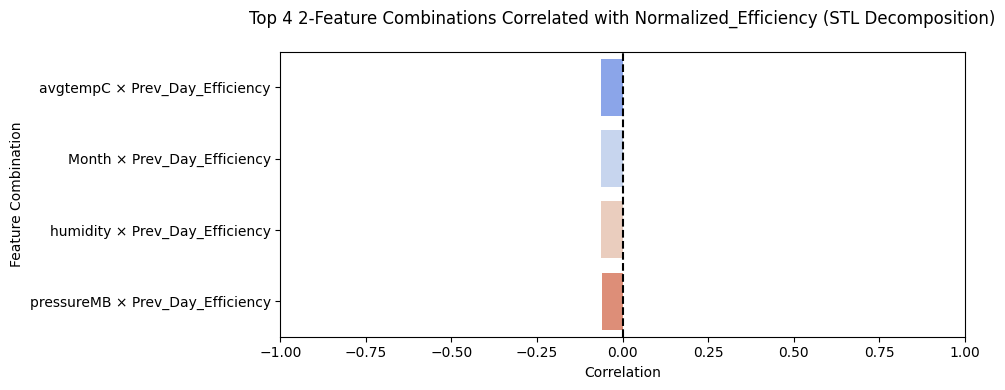

/var/folders/x0/t4xvycdd6mz7b1y2rk0pl9mw0000gn/T/ipykernel_7585/1572095338.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


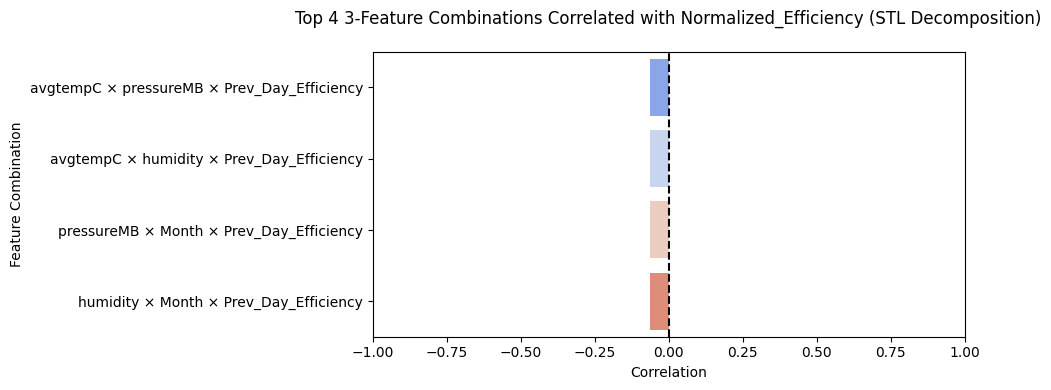

/var/folders/x0/t4xvycdd6mz7b1y2rk0pl9mw0000gn/T/ipykernel_7585/1572095338.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


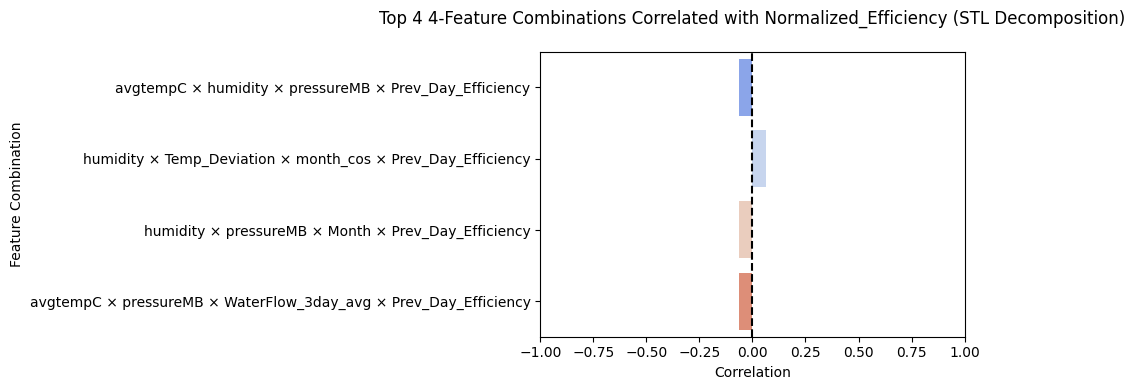

/var/folders/x0/t4xvycdd6mz7b1y2rk0pl9mw0000gn/T/ipykernel_7585/1572095338.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


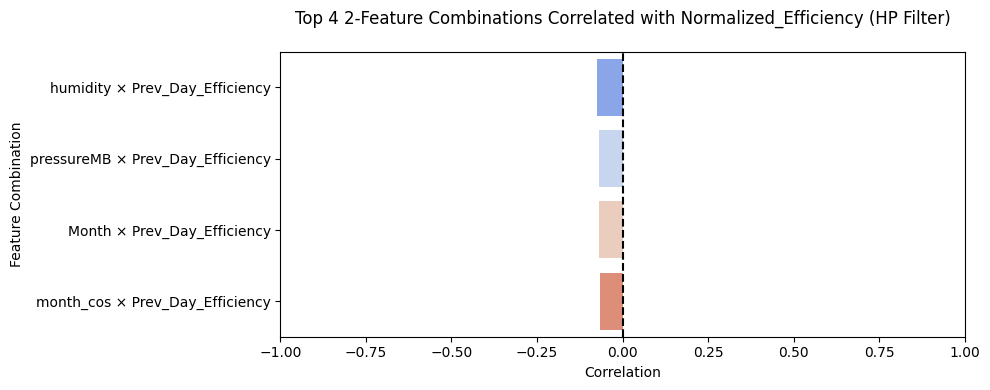

/var/folders/x0/t4xvycdd6mz7b1y2rk0pl9mw0000gn/T/ipykernel_7585/1572095338.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


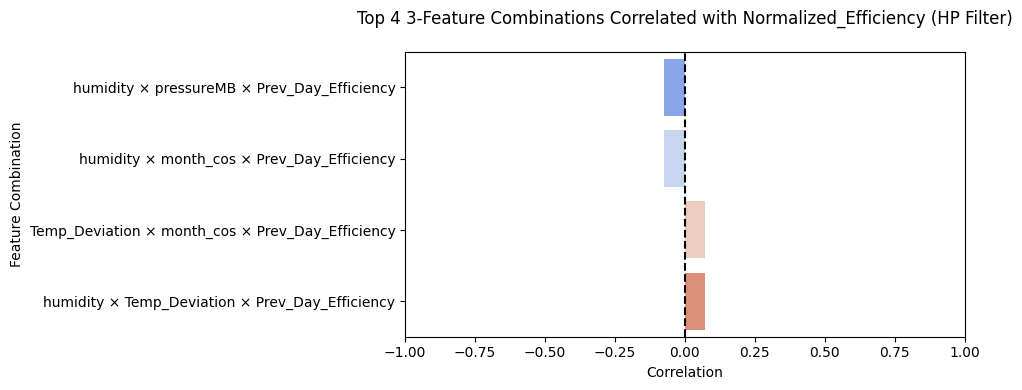

/var/folders/x0/t4xvycdd6mz7b1y2rk0pl9mw0000gn/T/ipykernel_7585/1572095338.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


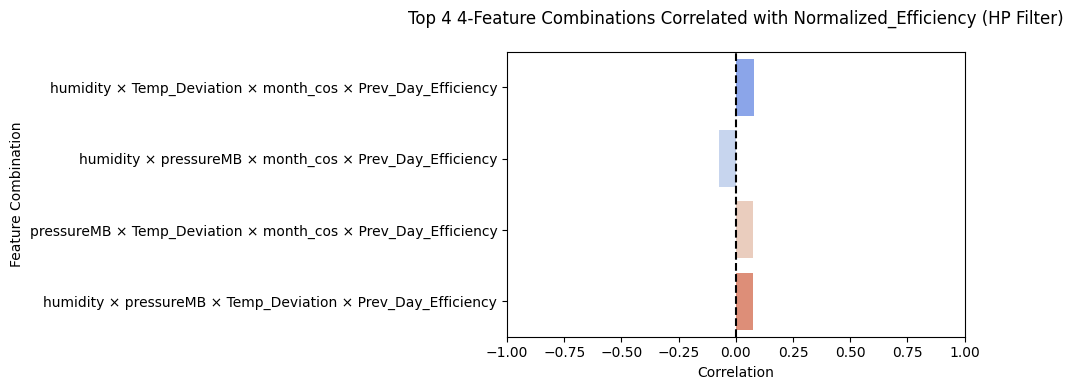

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from itertools import combinations
import numpy as np

def plot_combination_correlations(df, title, n_combinations=2, top_n=4):
    # Keep only numeric columns
    numeric_df = df.select_dtypes(include=['float64', 'int64'])
    
    # Check if target exists
    if "Normalized_Efficiency" not in numeric_df.columns:
        raise ValueError(f"'Normalized_Efficiency' missing in {title} data.")
    
    # Get features (exclude target)
    features = [col for col in numeric_df.columns if col != "Normalized_Efficiency"]
    
    # Generate all possible combinations
    feature_combinations = list(combinations(features, n_combinations))
    
    # Calculate correlation for each combination
    combo_correlations = []
    for combo in feature_combinations:
        # Create interaction term by multiplying features
        interaction_name = " × ".join(combo)
        numeric_df[interaction_name] = numeric_df[list(combo)].prod(axis=1)
        
        # Calculate correlation with target
        corr = numeric_df[interaction_name].corr(numeric_df["Normalized_Efficiency"])
        combo_correlations.append((interaction_name, corr))
        
        # Remove the temporary interaction column
        numeric_df.drop(interaction_name, axis=1, inplace=True)
    
    # Sort by absolute correlation and get top_n
    combo_correlations.sort(key=lambda x: abs(x[1]), reverse=True)
    top_combos = combo_correlations[:top_n]
    
    # Create dataframe for plotting
    plot_data = pd.DataFrame(top_combos, columns=['Feature Combination', 'Correlation'])
    
    # Plot
    plt.figure(figsize=(10, 4))
    sns.barplot(
        x='Correlation',
        y='Feature Combination',
        data=plot_data,
        palette='coolwarm'
    )
    plt.title(f"Top {top_n} {n_combinations}-Feature Combinations Correlated with Normalized_Efficiency ({title})", pad=20)
    plt.xlim(-1, 1)
    plt.axvline(0, color='black', linestyle='--')
    plt.tight_layout()
    plt.show()

def plot_correlation_heatmap(df, title):
    # Keep only numeric columns
    numeric_df = df.select_dtypes(include=['float64', 'int64'])
    
    # Check if target exists
    if "Normalized_Efficiency" not in numeric_df.columns:
        raise ValueError(f"'Normalized_Efficiency' missing in {title} data.")
    
    # Calculate correlations and drop self-correlation
    corr_matrix = numeric_df.corr()
    corr_with_target = corr_matrix[["Normalized_Efficiency"]].drop("Normalized_Efficiency")
    
    # Plot
    plt.figure(figsize=(10, 6))
    sns.heatmap(
        corr_with_target.sort_values(by="Normalized_Efficiency", ascending=False),
        annot=True,
        cmap="coolwarm",
        vmin=-1,
        vmax=1,
        fmt=".2f",
        linewidths=0.5)
    plt.title(f"Features Correlated with Normalized_Efficiency ({title})", pad=20)
    plt.yticks(rotation=0)
    plt.show()

# Load data
stl_path = "../processed_data/STL/stl_energy_production_with_engineered_features.csv"
hp_path = "../processed_data/HP/hp_energy_production_with_engineered_features.csv"

stl_df = pd.read_csv(stl_path)
hp_df = pd.read_csv(hp_path)

# Combination plots for STL
plot_combination_correlations(stl_df, "STL Decomposition", n_combinations=2, top_n=4)
plot_combination_correlations(stl_df, "STL Decomposition", n_combinations=3, top_n=4)
plot_combination_correlations(stl_df, "STL Decomposition", n_combinations=4, top_n=4)

# Combination plots for HP
plot_combination_correlations(hp_df, "HP Filter", n_combinations=2, top_n=4)
plot_combination_correlations(hp_df, "HP Filter", n_combinations=3, top_n=4)
plot_combination_correlations(hp_df, "HP Filter", n_combinations=4, top_n=4)